In [3]:
import json
import numpy as np

In [4]:
with open('session_info_for_users_with_all_interventions_enabled.json') as file:
    users = json.load(file)
print (len(users))

FileNotFoundError: [Errno 2] No such file or directory: 'session_info_for_users_with_all_interventions_enabled.json'

In [132]:
interventionToSession = {}
for user in users.keys():
    for domain in users[user].keys():
        for intervention in users[user][domain].keys():
            key = intervention
            ind = intervention.find('_')
            s = intervention[0:ind]
            if s == 'generated':
                ind2 = intervention.find('/')
                key = 'generic' + intervention[ind2:]
            if key in interventionToSession.keys():
                interventionToSession[key].extend(users[user][domain][intervention])
            else:
                interventionToSession[key] = users[user][domain][intervention]
print (interventionToSession)

dict_keys(['facebook/show_user_info_interstitial', 'facebook/remove_comments', 'facebook/toast_notifications', 'facebook/close_tab_timer', 'facebook/show_timer_banner', 'facebook/remove_clickbait', 'facebook/feed_injection_timer', 'facebook/remove_news_feed', 'facebook/make_user_wait', 'facebook/block_after_interval_per_visit', 'facebook/rich_notifications', 'facebook/scroll_blocker', 'facebook/prompt_reason', 'youtube/toast_notifications', 'youtube/remove_sidebar_links', 'youtube/remove_comment_section', 'youtube/prompt_before_watch', 'youtube/show_timer_banner', 'youtube/block_after_interval_per_visit', 'twitter/remove_twitter_feed', 'twitter/show_timer_banner', 'twitter/show_user_info_interstitial', 'twitter/make_user_wait', 'twitter/scroll_blocker', 'twitter/block_after_interval_per_visit', 'twitter/toast_notifications', 'youtube/remove_recommended', 'twitter/close_tab_timer', 'generic/block_after_interval_per_visit', 'generic/show_timer_banner', 'generic/close_tab_timer', 'generic

In [133]:
with open('interventions.json') as file:
    interventions = json.load(file)
for i in interventions.keys():
    ind = i.find('_')
    s = i[0:ind]
    if s == 'generic':
        ind2 = i.find('/')
        oldkey = i
        newkey = 'generic' + i[ind2:]
        interventions[newkey] = interventions.pop(oldkey)
print (interventions)

{'amazon/block_after_interval_per_visit': {'description': 'Asks how long you want to spend on site this visit', 'displayname': 'Bouncer', 'difficulty': 'hard', 'content_scripts': [{'path': '/interventions/generic/block_after_interval_per_visit/frontend.js', 'run_at': 'document_start', 'all_frames': False}], 'parameters': [{'name': 'cheatseconds', 'description': 'Seconds to cheat for after time is up', 'default': 30, 'type': 'int'}, {'name': 'debug', 'description': 'Insert debug console', 'type': 'bool', 'default': False}], 'categories': ['interstitial'], 'generic_intervention': 'generic/block_after_interval_per_visit', 'matches': ['www.amazon.com'], 'goals': ['amazon/spend_less_time'], 'name': 'amazon/block_after_interval_per_visit', 'sitename': 'amazon', 'sitename_printable': 'Amazon', 'is_default': False, 'nomatches': [], 'background_scripts': [], 'conflicts': ['amazon/make_user_wait', 'amazon/prompt_reason', 'amazon/show_user_info_interstitial', 'buzzfeed/block_after_interval_per_vi

In [134]:
difficultyToSession = {'easy':[], 'medium':[], 'hard':[]}
for intervention in interventionToSession.keys():
    if intervention in interventions.keys():
        difficultyToSession[interventions[intervention]['difficulty']].extend(interventionToSession[intervention])
    else:
        print (intervention)
print (difficultyToSession)

temp_intervention
{'easy': [14, 11, 15, 16, 50, 87, 159, 282, 307, 8, 44, 115, 394, 460, 22, 31, 3, 5, 12, 1, 37, 20, 130, 131, 10, 20, 24, 25, 25, 68, 91, 99, 101, 70, 193, 201, 16, 6, 7, 45, 85, 199, 251, 374, 465, 492, 521, 589, 712, 835, 958, 976, 1070, 1096, 1173, 1174, 1177, 1185, 1193, 1234, 1259, 1265, 3, 47, 13, 27, 25, 24, 94, 216, 322, 420, 23, 6, 49, 79, 101, 103, 9, 14, 26, 92, 8, 143, 27, 132, 161, 284, 331, 372, 491, 549, 575, 577, 31, 16, 34, 36, 40, 65, 23, 100, 43, 166, 289, 320, 9, 105, 4, 18, 74, 73, 196, 248, 7, 10, 4, 89, 117, 144, 19, 6, 27, 11, 51, 122, 33, 27, 54, 2, 3, 22, 41, 106, 227, 47, 143, 176, 26, 116, 181, 204, 219, 280, 331, 381, 41, 114, 223, 4, 14, 16, 13, 9, 43, 59, 5, 19, 33, 10, 44, 92, 180, 181, 184, 57, 4, 13, 421, 30, 57, 9, 3, 42, 49, 42, 46, 5, 37, 3, 85, 94, 41, 6, 31, 24, 28, 62, 93, 1, 31, 21, 83, 13, 11, 11, 7, 81, 118, 55, 45, 58, 62, 146, 3, 12, 23, 98, 168, 234, 239, 265, 288, 318, 334, 424, 424, 15, 72, 11, 19, 31, 6635, 32, 41, 78, 

In [135]:
mean = {'easy':0, 'medium': 0, 'hard': 0}
stdev = {'easy':0, 'medium': 0, 'hard': 0}
difficultyToSession['easy'] = np.array(difficultyToSession['easy'])
difficultyToSession['medium'] = np.array(difficultyToSession['medium'])
difficultyToSession['hard'] = np.array(difficultyToSession['hard'])
for key in mean.keys():
    mean[key] = np.mean(difficultyToSession[key])
    stdev[key] = np.std(difficultyToSession[key])
    print (key)
    print (np.max(difficultyToSession[key]))
    print (np.min(difficultyToSession[key]))
print (mean)
print (stdev)

easy
10279
1
medium
15513
1
hard
24030
1
{'easy': 552.0461578733058, 'medium': 958.2546366676802, 'hard': 631.8190768746061}
{'easy': 949.1097198751323, 'medium': 1893.16146768596, 'hard': 2033.4607975110177}


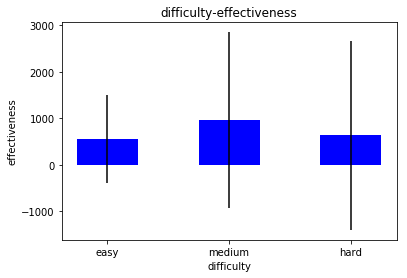

{'easy': 552.0461578733058, 'medium': 958.2546366676802, 'hard': 631.8190768746061}


In [136]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars 
left = [1, 2, 3]
 
# heights of bars
height = [mean['easy'], mean['medium'], mean['hard']]
 
# labels for bars
tick_label = ['easy', 'medium', 'hard']

err = [stdev['easy'], stdev['medium'], stdev['hard']]
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.5, color = ['blue'], yerr = err )
 
# naming the x-axis
plt.xlabel('difficulty')
# naming the y-axis
plt.ylabel('effectiveness')
# plot title
plt.title('difficulty-effectiveness')
 
# function to show the plot
plt.show()
print (mean)

In [137]:
from scipy import stats

In [138]:
stats.ttest_ind(difficultyToSession['easy'], difficultyToSession['medium'], equal_var = False)

Ttest_indResult(statistic=-16.99722316740604, pvalue=1.4653181829016703e-63)

In [139]:
stats.ttest_ind(difficultyToSession['medium'], difficultyToSession['hard'], equal_var = False)

Ttest_indResult(statistic=11.063042463917716, pvalue=2.4759637247217117e-28)

In [140]:
stats.ttest_ind(difficultyToSession['easy'], difficultyToSession['hard'], equal_var = False)

Ttest_indResult(statistic=-4.252414393996178, pvalue=2.1277724948886843e-05)

In [141]:
stats.ttest_ind(difficultyToSession['easy'], difficultyToSession['medium'])

Ttest_indResult(statistic=-26.1555085050357, pvalue=1.4507038591440066e-149)

In [142]:
stats.ttest_ind(difficultyToSession['medium'], difficultyToSession['hard'])

Ttest_indResult(statistic=10.815305735765689, pvalue=3.486984534640592e-27)

In [143]:
stats.ttest_ind(difficultyToSession['easy'], difficultyToSession['hard'])

Ttest_indResult(statistic=-5.768758883174548, pvalue=8.035633204330432e-09)

In [144]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

def isNormal(data):
    # normality test
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False

In [145]:
for i in tick_label:
    difficultyToSession[i] = (np.log(difficultyToSession[i]))
    print (i)
    print(isNormal(difficultyToSession[i]))

easy
Statistics=0.982, p=0.000
False
medium
Statistics=0.990, p=0.000
False
hard
Statistics=0.995, p=0.000
False


/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [146]:
from scipy import stats
stats.kruskal(difficultyToSession['easy'], difficultyToSession['medium'], difficultyToSession['hard'])

KruskalResult(statistic=1105.6423587658924, pvalue=8.181111557590236e-241)

In [147]:
#pvalue so small => significant difference between the means exist

In [148]:
import scikit_posthocs as sp

In [149]:
x = [difficultyToSession['easy'], difficultyToSession['medium'], difficultyToSession['hard']]

In [150]:
sp.posthoc_dunn(x)

array([[-1.00000000e+000,  1.58507443e-026,  9.28180553e-180],
       [ 1.58507443e-026, -1.00000000e+000,  1.00078886e-184],
       [ 9.28180553e-180,  1.00078886e-184, -1.00000000e+000]])

In [151]:
#all the p values are small enough so the results are significant => medium > hard > easy 

In [152]:
sp.posthoc_conover(x)

array([[-1.00000000e+000,  5.07153691e-027,  4.30342963e-182],
       [ 5.07153691e-027, -1.00000000e+000,  4.37588461e-187],
       [ 4.30342963e-182,  4.37588461e-187, -1.00000000e+000]])